# Linear Regression Exercise to predict the cost of insurance

### 0. Import libraries

In [12]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

### 1. ETL (Extract, Transform, and Load) data

In [13]:
# Import insurance dataset
df_insurance = pd.read_csv("datasets/insurance.csv")

# Check the first 5 rows of the dataset
df_insurance.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

### 2. Data Cleaning / 4. Exploratory Data Analysis

In [14]:
# Use LabelEncoder to convert categorical features into numerical features
label_encoder = LabelEncoder()
df_insurance["sex"] = label_encoder.fit_transform(df_insurance["sex"])
df_insurance["smoker"] = label_encoder.fit_transform(df_insurance["smoker"])
df_insurance["region"] = label_encoder.fit_transform(df_insurance["region"])

### 3. Train-Test-Validation Split / 5. Feature Engineering (Not done here)

In [32]:
# Select X and Y
X = df_insurance[["age", "sex", "bmi", "children", "smoker", "region"]] 
y = df_insurance["charges"]

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
# Scale data by normalizing the numerical data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### 6. Model Selection and Implementation

In [34]:
# Build model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict against the testing set
y_pred = model.predict(X_test_scaled)

### 7. Model Evaluation

In [35]:
# Evaluate the model
mean = np.mean(y_pred, axis = 0)
std = np.std(y_pred, axis = 0)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

In [36]:
# Print the evaluation metrics
print(f"Average cost of the insurance: {mean:.2f}")
print(f"Standard deviation: {std:.2f}")
print(f"Mean absolute error (MAE): {mae:.2f}")
print(f"Mean squared error (MSE): {mse:.2f}")
print(f"Root mean squared error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) score: {r2:.2f}")

Average cost of the insurance: 13094.10
Standard deviation: 10765.18
Mean absolute error (MAE): 4186.01
Mean squared error (MSE): 33633113.94
Root mean squared error (RMSE): 5799.41
R-squared (R2) score: 0.78


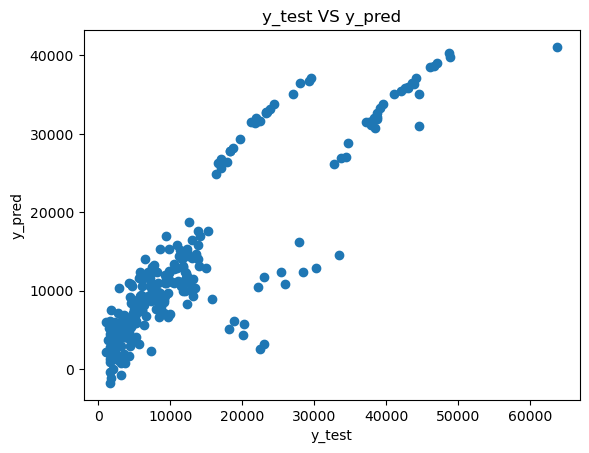

In [37]:
# Show the plot graph
plt.scatter(y_test, y_pred)
plt.title("y_test VS y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()